In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import random

#### **PREPROCESSING AND ANALYSIS**

#### [1] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places


In [3]:
euCities = pd.read_csv('EuCitiesTemperatures.csv')
df = DataFrame(euCities)
country = round(df.groupby('country').mean(), 2)
updated_df = df.copy()
for index in updated_df.index:
    if str(updated_df.loc[index, 'latitude']) == 'nan':
        updated_df.loc[index, 'latitude'] = country['latitude'][updated_df.loc[index, 'country']]
for index in updated_df.index:
    if str(updated_df.loc[index, 'longitude']) == 'nan':
        updated_df.loc[index, 'longitude'] = country['longitude'][updated_df.loc[index, 'country']]
updated_df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


#### [2] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [4]:
filteredDf = DataFrame(updated_df[(updated_df['latitude'] >= 40) & (updated_df['latitude'] <= 60) & (updated_df['longitude'] >= 15) & (updated_df['longitude']<=30)])
country_frq_dict = filteredDf['country'].value_counts().to_dict()
max_value = max(country_frq_dict.values())
a = [k for k,v in country_frq_dict.items() if v == max_value]
print('Countries that have the maximum number of cities in this geographical band is/are:')
for i in a:
    print(i)

Countries that have the maximum number of cities in this geographical band is/are:
Romania
Poland


#### [3] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no) 


In [5]:
region = round(updated_df.groupby(['EU','coastline']).mean(), 2)
for id, row in updated_df.iterrows():
    tup = row.loc['EU'], row.loc['coastline']
    value = region['temperature'][tup]
    if pd.isnull(row['temperature']):
        updated_df.loc[id, 'temperature'] = value
updated_df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


#### **VISUALIZATION**

#### [1] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above

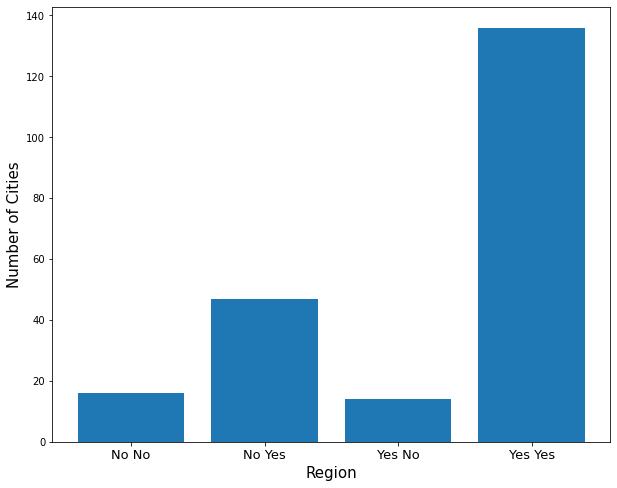

In [6]:
region = updated_df.groupby(['EU','coastline']).count()
region = region.reset_index()
region.drop(columns = ['country', 'population', 'latitude', 'longitude', 'temperature'])
plt.figure(figsize=(10,8))
plt.bar(range(0,4), region['city'])
plt.xticks(range(0,4), ['No No','No Yes', 'Yes No','Yes Yes'], fontsize = 13)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Number of Cities', fontsize =15)
plt.show()

#### [2] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color

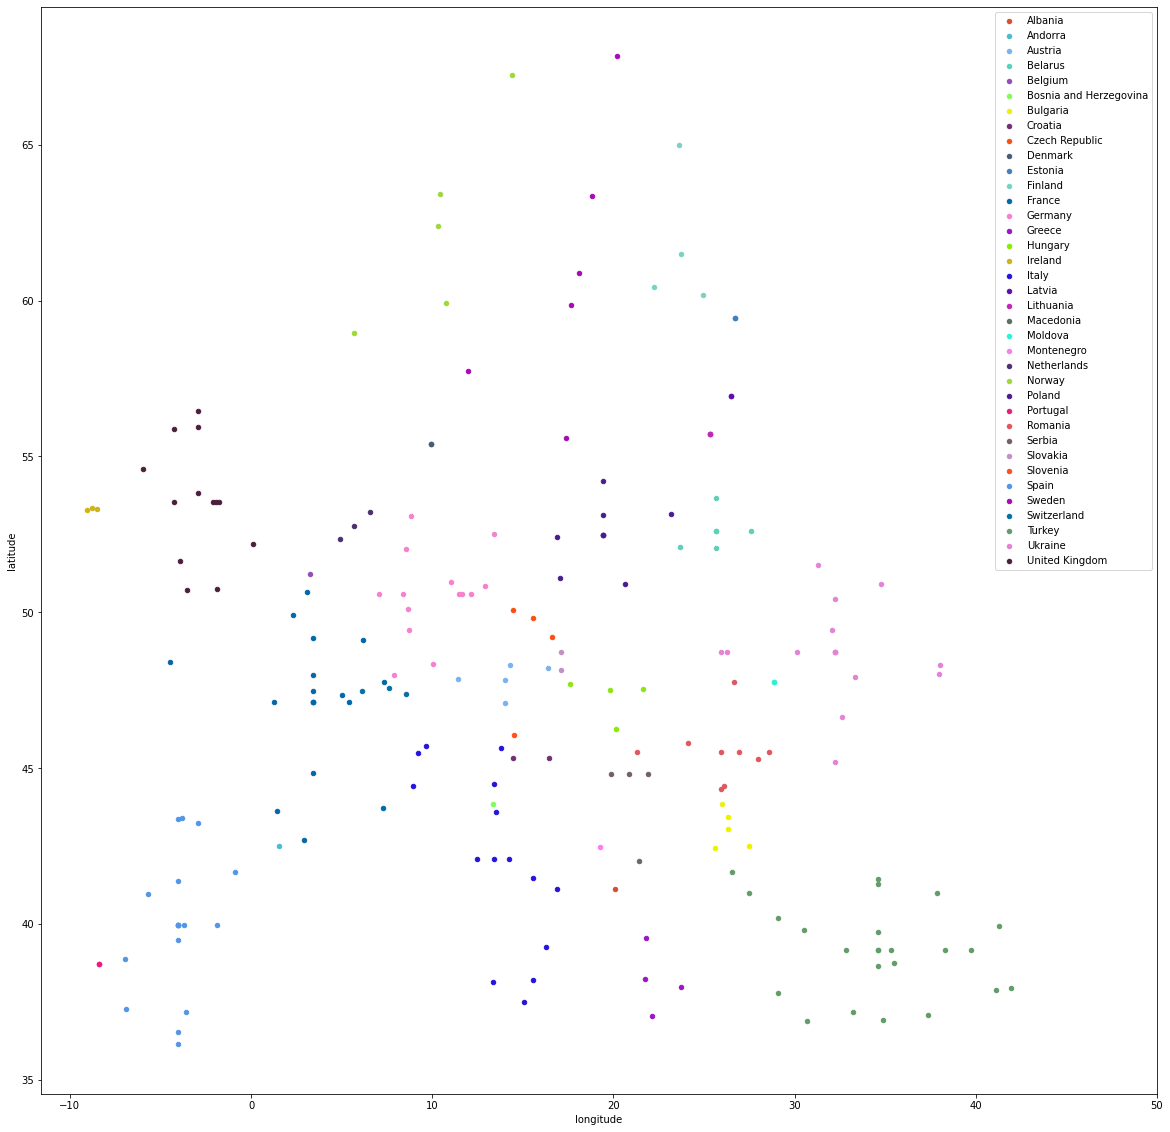

In [7]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,20)
country_types = updated_df['country'].unique()
colors= []
for i in range(0,37):
    r = random.random()
    g = random.random()
    b = random.random()
    colors.append((r,g,b))
for country, color in zip(country_types, colors):
    df = updated_df[updated_df['country'] == country]    
    df.plot('longitude','latitude',ax=ax,kind='scatter',color=color, label =country)
    plt.xticks(range(-10, 60,10))

#### [3] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups)

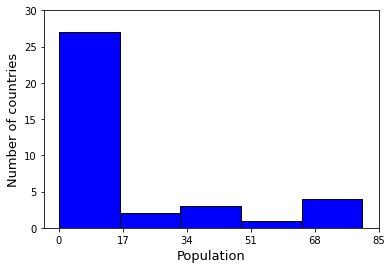

In [8]:
region2 = updated_df.groupby(['EU','coastline', 'country']).mean()
l = list(region2['population'])
plt.hist(l, color = 'blue',  bins = 5, edgecolor = 'black')
plt.xlabel('Population', fontsize = 13)
plt.ylabel('Number of countries',fontsize = 13)
plt.xticks(range(0,86, 17))
plt.yticks(range(0,31,5))
plt.show()

#### [4] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above
##### Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1

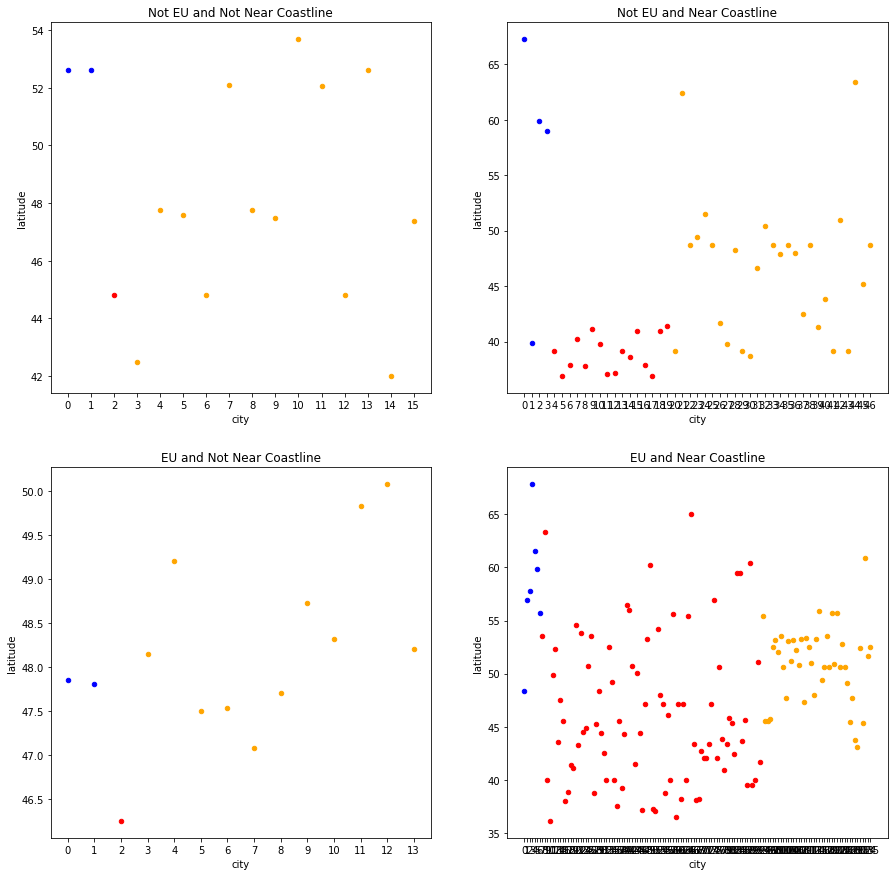

In [9]:
def get_region(region, i, j):
    res_df = pd.DataFrame()
    if i == 0:
        if j == 0:
            res_df = region[(region['EU'] == 'no') & (region['coastline']=='no')]
        elif j == 1:
            res_df = region[(region['EU'] == 'no') & (region['coastline']=='yes')]
    elif i == 1:
        if j == 0:
            res_df = region[(region['EU'] == 'yes') & (region['coastline']=='no')]
        elif j == 1:
            res_df = region[(region['EU'] == 'yes') & (region['coastline']=='yes')]
    return res_df
fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,15)
region = updated_df.groupby(['EU','coastline', 'city']).mean()
region = region.reset_index()

colors = ['blue', 'red', 'orange']

for i in range(0,2):
    for j in range(0,2):
        df = get_region(region, i, j)
        n = df['city'].count()
        for color in colors:
            if(color == 'blue'):
                df2 = df[df['temperature'] < 6.0]
            elif(color == 'red'):
                df2 = df[df['temperature'] > 10.0]
            elif(color == 'orange'):
                df2 = df[ (df['temperature'] >= 6.0) & (df['temperature'] <= 10.0) ] 
            df2.plot('city','latitude', kind = 'scatter', ax = axes[i][j], color = color)
        plt.sca(axes[i][j])
        plt.xticks(range(n), np.arange(0,n,1))
axes[0][0].set_title('Not EU and Not Near Coastline')
axes[0][1].set_title('Not EU and Near Coastline')
axes[1][0].set_title('EU and Not Near Coastline')
axes[1][1].set_title('EU and Near Coastline')
plt.show()

# We fill our graphs with blue cities first, then reds, then oranges. Hence the pattern below.

In [10]:
#print(pd.__version__)


In [11]:
#pip install --upgrade pandas